## Data Analysis On Walmart

- ANALYSIS 

## Installing Packages and Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import requests
import hvplot.pandas
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
import plotly.express as px
import plotly.graph_objects as go
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LinearRegression


## Step 1: Download the dataset

In [2]:
# Extrating Raw Data for Walmart
csv_file_path = '../Final_project/Resources/Walmart.csv'
df = pd.read_csv(csv_file_path)
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [3]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

In [4]:
month = df['Month'] = df['Date'].dt.month

In [5]:
year = df['Year'] = df['Date'].dt.year

In [6]:
df['Month'] = month
df['Year'] = year
df['Week'] = df['Date'].dt.isocalendar().week
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Year,Week
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2,2010,5
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2,2010,6
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2,2010,7
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2,2010,8
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,3,2010,9


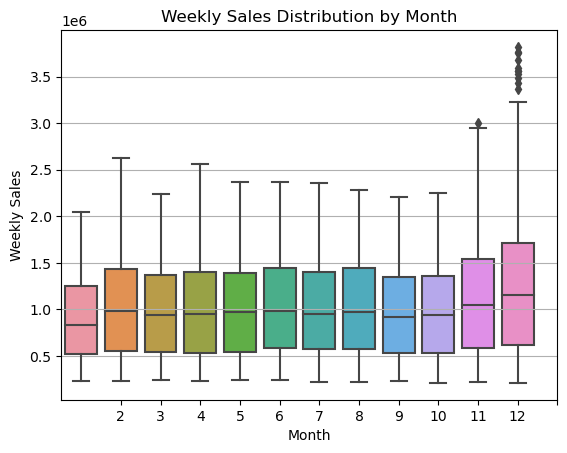

In [7]:
import seaborn as sns
# Plot box plot
sns.boxplot(x='Month', y='Weekly_Sales', data=df)
plt.xlabel('Month')
plt.ylabel('Weekly Sales')
plt.title('Weekly Sales Distribution by Month')
plt.xticks(range(1, 13))
plt.grid(axis='y')
plt.show()

/Users/taylorhipkins/anaconda3/envs/dev/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/taylorhipkins/anaconda3/envs/dev/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/taylorhipkins/anaconda3/envs/dev/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/taylorhipkins/anaconda3/envs/dev/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na 

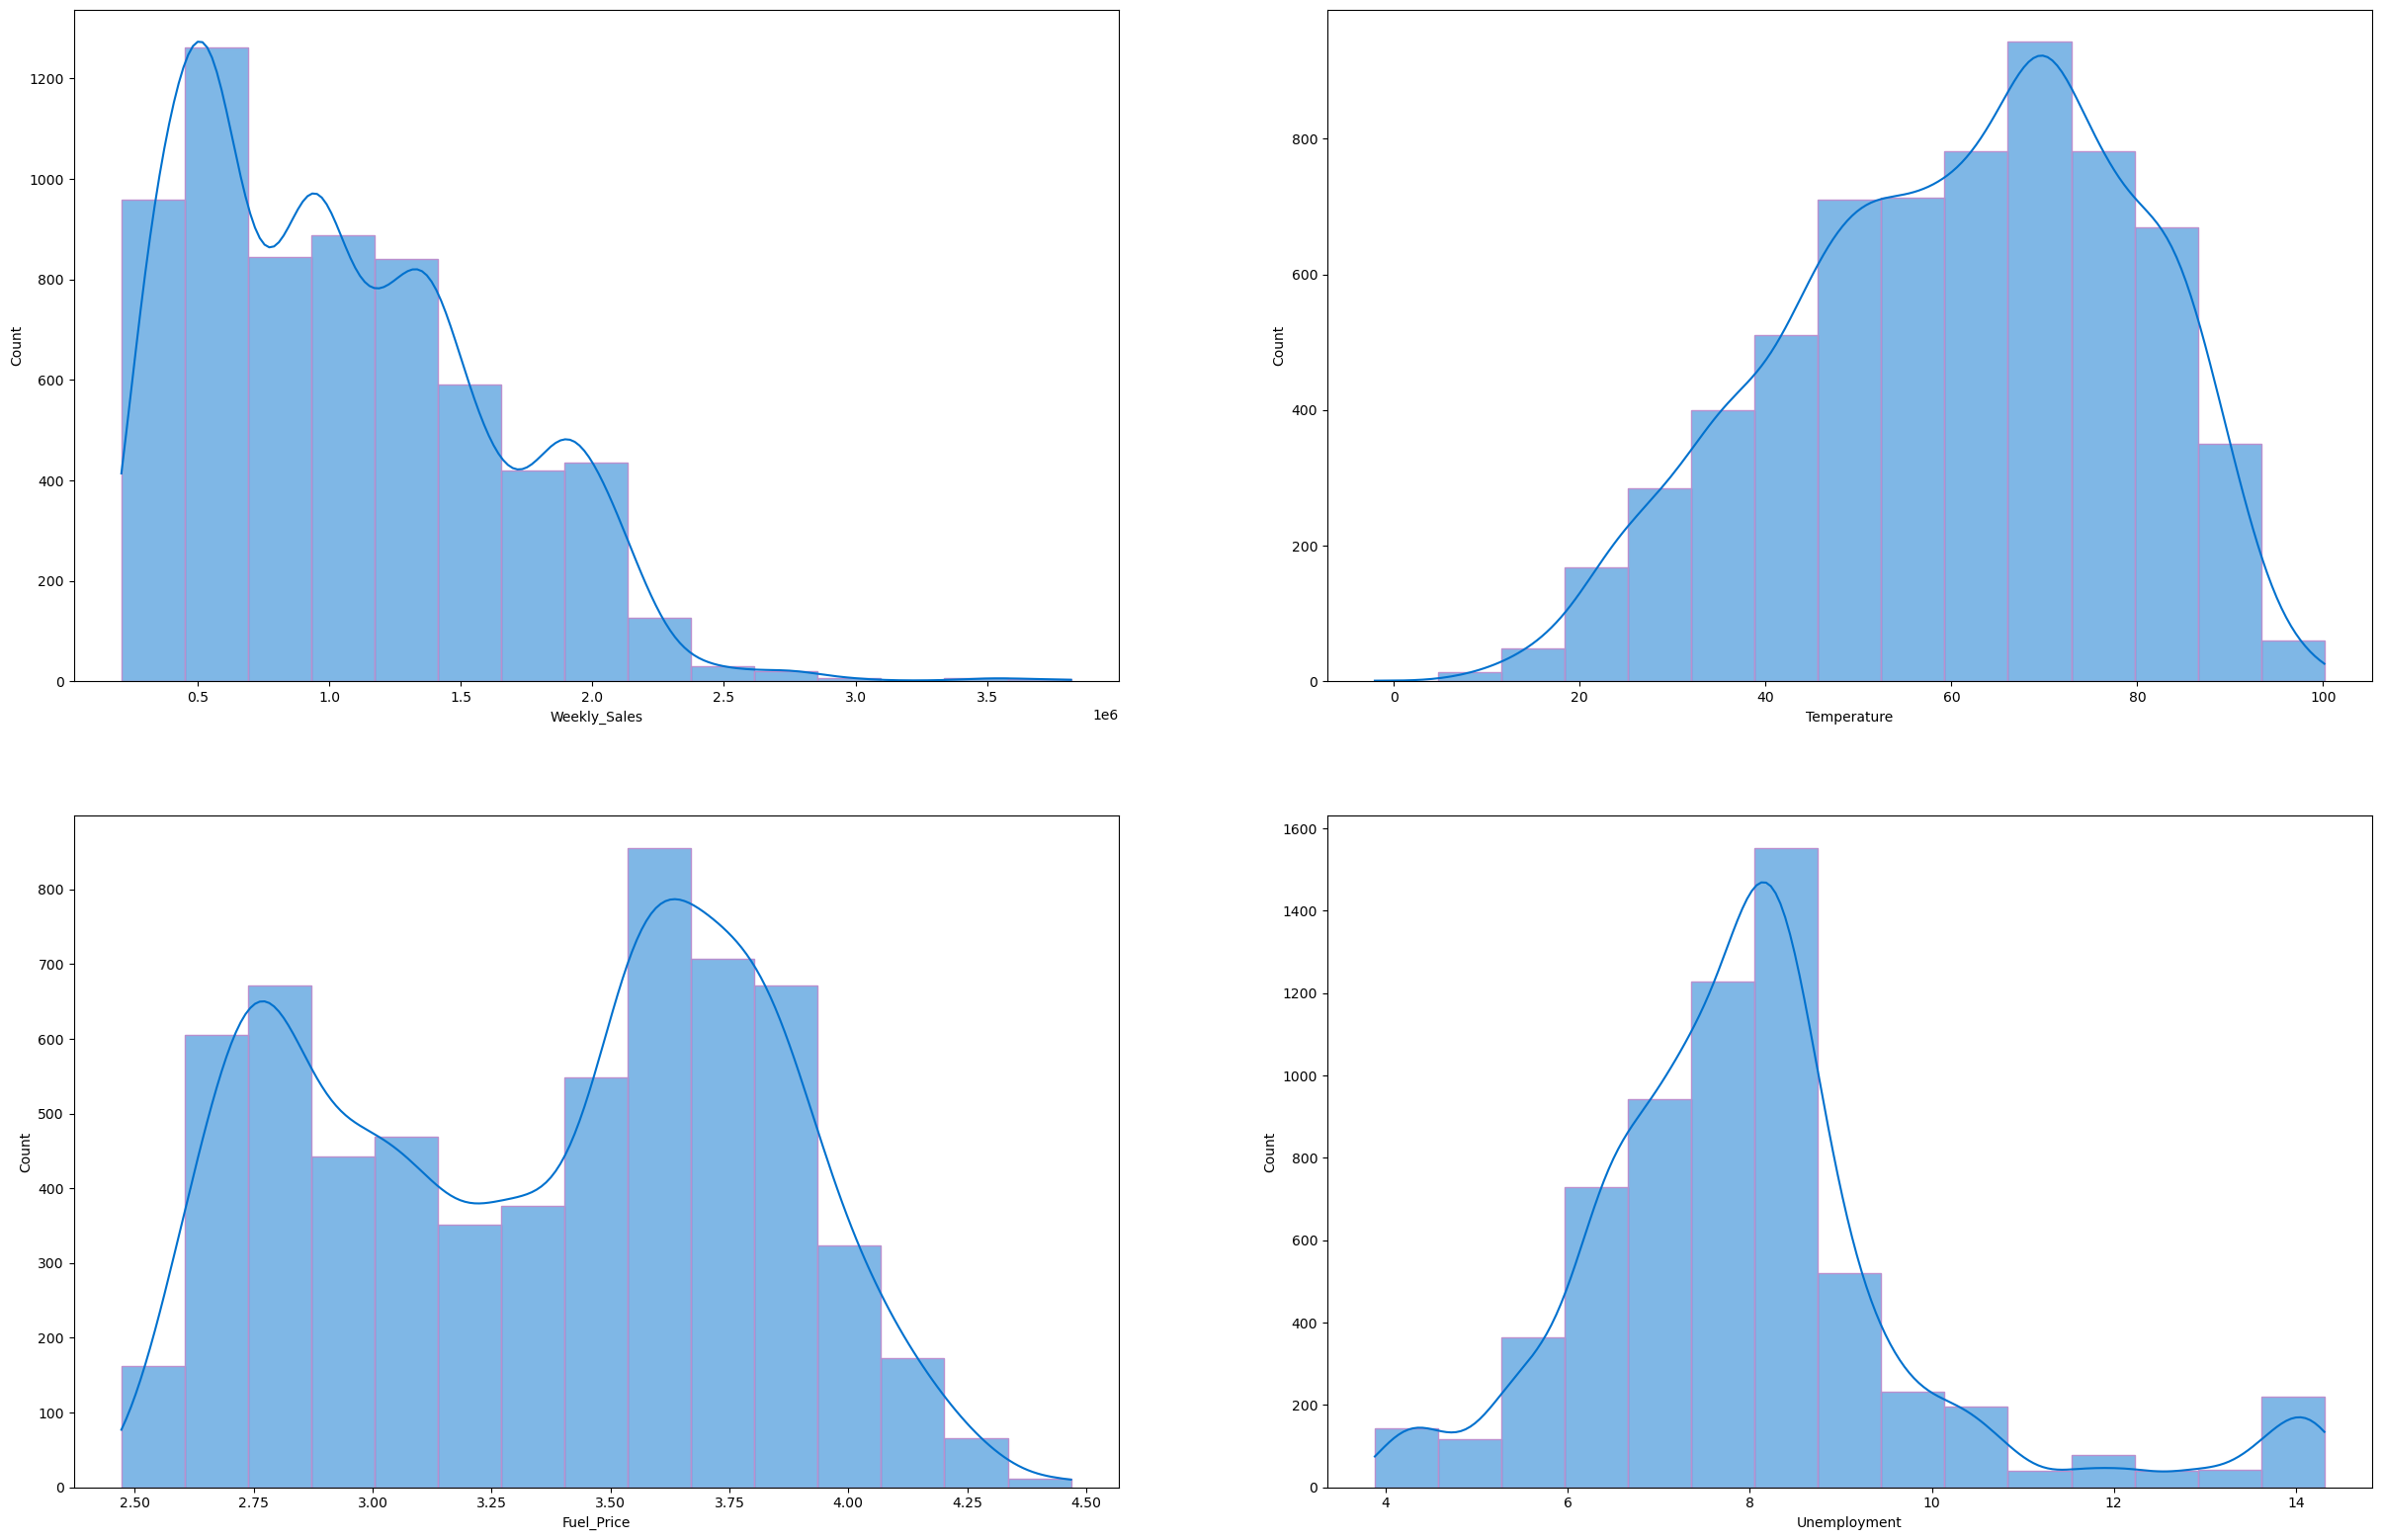

In [8]:
# Create a Histogram to show the distribution of the data for 
# Weekly Sales, "Temperature", "Fuel Price", and "Unemployment"

columns = ['Weekly_Sales', 'Temperature', 'Fuel_Price', 'Unemployment']
plt.figure(figsize=(30,30))
for i,col in enumerate(columns):
    plt.subplot(3, 2, i+1)
    sns.histplot(data = df, x = col, kde = True, bins = 15, color='#0071CE', edgecolor='#BB8FCE')

In [9]:
monthly_sales = df.groupby('Month')['Weekly_Sales'].sum()
figure = px.scatter(
    data_frame=df,
    x="Weekly_Sales",
    y="Month",
    color="Year",
    size="Weekly_Sales",  # Specify the column you want to use for size
    trendline="ols"
)
figure.show()

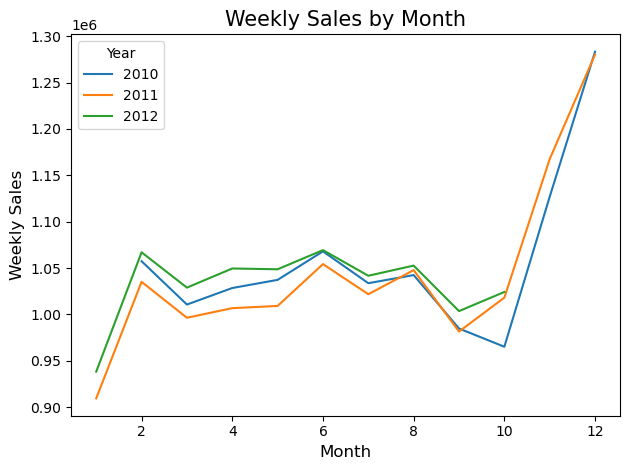

In [10]:
#What are the highest performing months? (Weekly sales by month)

monthly_sales = pd.pivot_table(df, values = "Weekly_Sales", columns = "Year", index = "Month")

monthly_sales.plot()

plt.xlabel('Month', fontname="sans-serif", fontsize=12)
plt.ylabel('Weekly Sales', fontname="sans-serif", fontsize=12)
plt.title('Weekly Sales by Month', fontname="sans-serif", fontsize=15)

# plt.xticks(rotation=45, fontname="sans-serif", fontsize=30)
plt.tight_layout()
plt.show()

<Axes: xlabel='Week'>

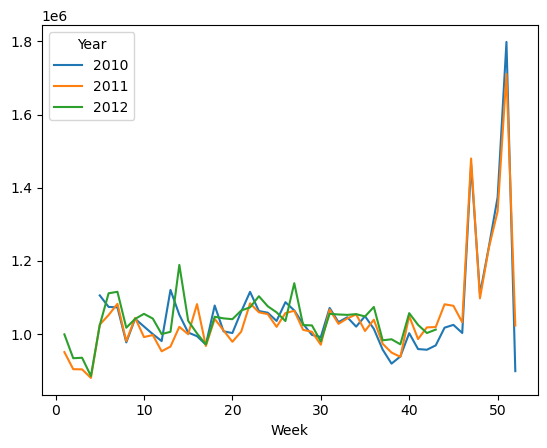

In [11]:
#What are the highest performing weeks? (sales by weeks)
weekly_sales = pd.pivot_table(df, values = "Weekly_Sales", columns = "Year", index = "Week")
weekly_sales.plot()

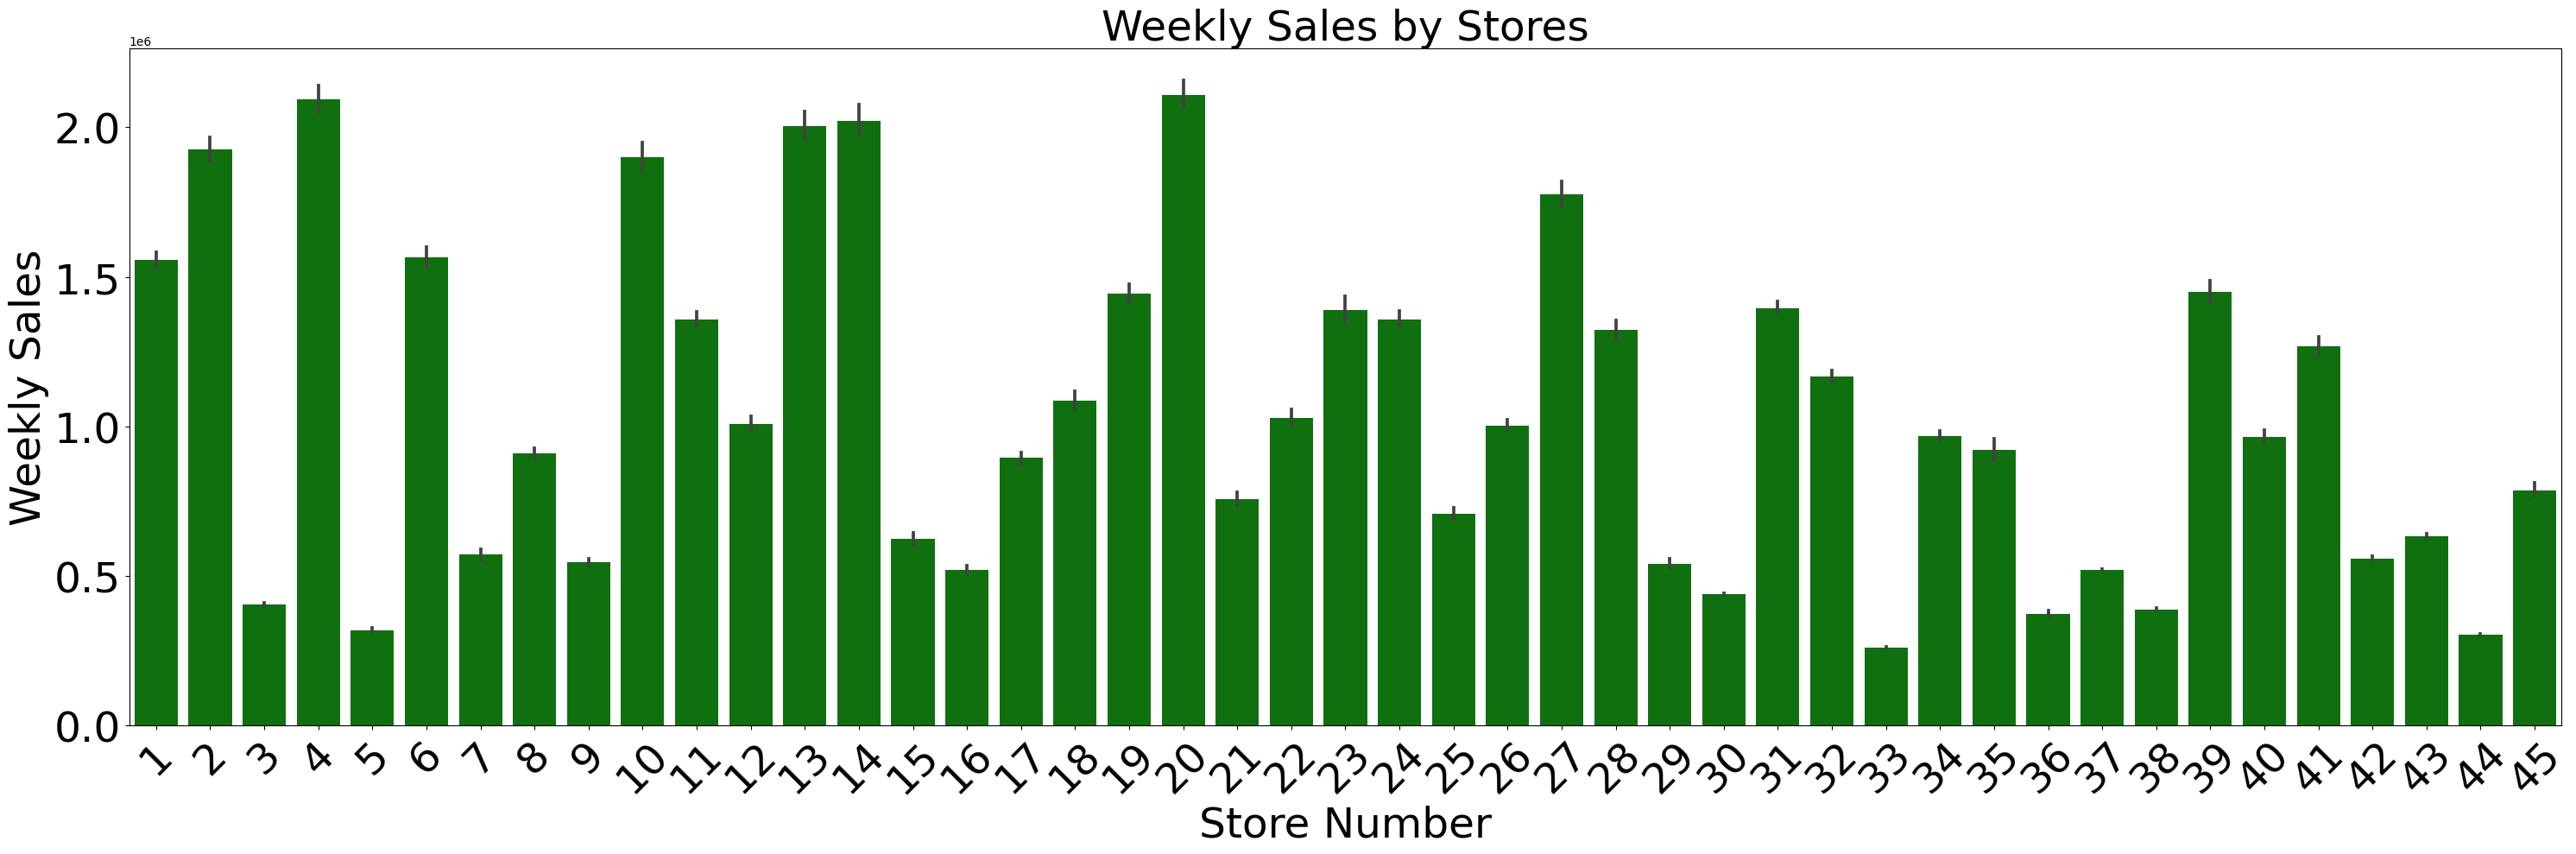

In [12]:
# Assuming df is your DataFrame containing the data
plt.figure(figsize=(30, 10))
fig = sns.barplot(x='Store', y='Weekly_Sales', color='#008000', data=df)

plt.xlabel('Store Number', fontname="sans-serif", fontsize=35)
plt.ylabel('Weekly Sales', fontname="sans-serif", fontsize=35)
plt.title('Weekly Sales by Stores', fontname="sans-serif", fontsize=35)

plt.xticks(rotation=45, fontname="sans-serif", fontsize=35)
plt.yticks(fontname="sans-serif", fontsize=35)
plt.tight_layout()
plt.show()

In [13]:
figure = px.scatter(
    data_frame=df,
    x="Year",
    y="Weekly_Sales",
    color="Store",
    trendline="ols"
)
figure.show()

In [14]:
import pandas as pd
import plotly.graph_objects as go

weekly_sales = df.groupby('Date')['Weekly_Sales'].sum()

# Create an interactive time series plot of weekly sales using Plotly
fig = go.Figure()

# Add a trace for weekly sales
fig.add_trace(go.Scatter(x=weekly_sales.index, y=weekly_sales.values, mode='lines+markers', name='Weekly Sales'))

# Update layout
fig.update_layout(
    title='Time Series Plot of Weekly Sales',
    xaxis_title='Date',
    yaxis_title='Weekly Sales',
    hovermode='x',
    showlegend=True
)

fig.show()

In [15]:
# Plot scatter plot of Weekly Sales vs. Temperature

fig = px.scatter(df, x='Temperature', y='Weekly_Sales', title='Weekly Sales vs. Temperature', labels={'Weekly_Sales': 'Weekly Sales'})
fig.update_layout(xaxis_title='Temperature', yaxis_title='Weekly Sales')

In [16]:
# Plot scatter plot of Weekly Sales vs. Fuel Price

fig = px.scatter(df, x='Fuel_Price', y='Weekly_Sales', title='Weekly Sales vs. Fuel Price', labels={'Weekly_Sales': 'Weekly Sales'})
fig.update_layout(xaxis_title='Fuel Price', yaxis_title='Weekly Sales')

fig.show()

In [17]:
monthly_sales = df.groupby('Month')['Weekly_Sales'].mean()

# Create an interactive line plot of Weekly Sales vs. Month using Plotly
fig = go.Figure()

fig.add_trace(go.Scatter(x=monthly_sales.index,
                         y=monthly_sales.values,
                         mode='lines+markers',
                         name='Weekly Sales'))

fig.update_layout(title='Weekly Sales vs. Month',
                  xaxis_title='Month',
                  yaxis_title='Average Weekly Sales',
                  xaxis=dict(tickmode='array',
                             tickvals=list(range(1, 13)),
                             ticktext=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']))

In [18]:
# Plot scatter plot of Weekly Sales vs. Store

fig = px.scatter(df, x='Store', y='Weekly_Sales', title='Weekly Sales vs. Store', labels={'Weekly_Sales': 'Weekly Sales'})
fig.update_layout(xaxis_title='Store', yaxis_title='Weekly Sales')

In [19]:
df.nunique()

Store             45
Date             143
Weekly_Sales    6435
Holiday_Flag       2
Temperature     3528
Fuel_Price       892
CPI             2145
Unemployment     349
Month             12
Year               3
Week              52
dtype: int64

In [20]:
df2 = pd.get_dummies(df, dtype=int)
df2

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Year,Week
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2,2010,5
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2,2010,6
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2,2010,7
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2,2010,8
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,3,2010,9
...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,9,2012,39
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667,10,2012,40
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667,10,2012,41
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,10,2012,42


In [21]:
y = df['Holiday_Flag']
X = df[['Weekly_Sales', 'Store', 'Unemployment',
       'Fuel_Price', 'CPI', 'Week', 'Temperature', 'Month', 'Year']]
# Split training/test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [22]:
# Preprocess numerical data for neural network

# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [23]:
# Define the deep learning model 
nn_model = tf.keras.models.Sequential()
nn_model.add(tf.keras.layers.Dense(units=16, activation="relu", input_dim=9))
nn_model.add(tf.keras.layers.Dense(units=16, activation="relu"))
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=50)

# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

AttributeError: module 'tensorflow' has no attribute 'keras'

In [ ]:
y = df['Holiday_Flag']
X = df[['Store', 'Weekly_Sales', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment', 'Month', 'Year', 'Week']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=1, 
                                                    stratify=y)

In [ ]:
# Import the LogisticRegression module from SKLearn
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
classifier = LogisticRegression(solver='lbfgs',
                                random_state=1)
classifier

# Fit the model using training data
classifier.fit(X_train, y_train)

LogisticRegression(random_state=1)

In [ ]:
# Make a prediction using the testing data
predictions = classifier.predict(X_test)
results = pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)
results.sample(25)

,Prediction,Actual
1078,0,1
1131,0,0
1316,0,0
1455,0,0
1261,0,0
38,0,0
1439,0,0
959,0,0
197,0,0
515,0,0


In [ ]:
# Generate a confusion matrix for the model
conf_matrix = confusion_matrix(y_test, predictions)

# Print confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[1496    0]
 [ 113    0]]


In [ ]:
# Print the classification report for the model
print("Classification Report:")
print(classification_report(y_test, predictions))

Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      1496
           1       0.00      0.00      0.00       113

    accuracy                           0.93      1609
   macro avg       0.46      0.50      0.48      1609
weighted avg       0.86      0.93      0.90      1609



/Users/eshapatel/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/eshapatel/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/eshapatel/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
y = df['Weekly_Sales']
X = df[['Store', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment', 'Month', 'Year', 'Week']]
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Create Model
model = LinearRegression()

In [ ]:
# Fit the Model
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Prediction 
predictions = model.predict(X_test)
predictions

array([1162156.92272994, 1090740.12562434, 1300301.65727919, ...,
        667529.82617825, 1253237.71425158, 1276281.06809006])

In [ ]:
print('Mean Squared Error:', mean_squared_error(y_test, predictions))
print('Mean Absolute Error:', mean_absolute_error(y_test, predictions))
print('R-squared:', r2_score(y_test, predictions))

Mean Squared Error: 272049348139.45178
Mean Absolute Error: 432594.9768878016
R-squared: 0.15553160499602892


In [ ]:
import pandas as pd
import plotly.graph_objects as go

# Assuming your data is stored in a DataFrame named 'df'

# Separate holiday and non-holiday sales data
holiday_sales = df[df['Holiday_Flag'] == 1]['Weekly_Sales']
non_holiday_sales = df[df['Holiday_Flag'] == 0]['Weekly_Sales']

# Create box plot figure using Plotly
fig = go.Figure()

# Add box traces for holiday and non-holiday sales
fig.add_trace(go.Box(y=holiday_sales, name='Holiday Sales'))
fig.add_trace(go.Box(y=non_holiday_sales, name='Non-Holiday Sales'))

# Update layout
fig.update_layout(title='Interactive Box Plot of Weekly Sales: Holiday vs. Non-Holiday',
                  xaxis=dict(title='Sales Category'),
                  yaxis=dict(title='Weekly Sales'))

# Show interactive plot
fig.show()

In [24]:
# Calculate average weekly sales for each store
avg_sales_by_store = df.groupby('Store')['Weekly_Sales'].mean().reset_index()

# Create the interactive bar chart using Plotly
fig = px.bar(avg_sales_by_store, x='Store', y='Weekly_Sales', 
             title='Average Weekly Sales by Store', 
             labels={'Weekly_Sales': 'Average Weekly Sales', 'Store': 'Store Number'},
             color_discrete_sequence=['skyblue'])
fig.update_layout(xaxis=dict(tickmode='linear'))  # Set tick mode to linear for integer x-axis
fig.show()


In [25]:
# Calculate total weekly sales for holiday and non-holiday weeks
total_sales_holiday = df[df['Holiday_Flag'] == 1]['Weekly_Sales'].sum()
total_sales_non_holiday = df[df['Holiday_Flag'] == 0]['Weekly_Sales'].sum()

# Create a DataFrame for the pie chart
pie_data = pd.DataFrame({'Holiday_Flag': ['Holiday', 'Non-Holiday'],
                         'Total_Weekly_Sales': [total_sales_holiday, total_sales_non_holiday]})

color_palette = ['#DAC3FF', '#B0E57C']
# Create the interactive pie chart using Plotly
fig = px.pie(pie_data, values='Total_Weekly_Sales', names='Holiday_Flag',
             title='Proportion of Total Weekly Sales by Holiday Flag',
             color_discrete_sequence=color_palette)
fig.show()

In [26]:
# Calculate total weekly sales for holiday and non-holiday weeks
total_sales_holiday = df[df['Holiday_Flag'] == 1]['Weekly_Sales'].mean()
total_sales_non_holiday = df[df['Holiday_Flag'] == 0]['Weekly_Sales'].mean()

# Create a DataFrame for the pie chart
pie_data = pd.DataFrame({'Holiday_Flag': ['Holiday', 'Non-Holiday'],
                         'Total_Weekly_Sales': [total_sales_holiday, total_sales_non_holiday]})

color_palette = ['#DAC3FF', '#B0E57C']
# Create the interactive pie chart using Plotly
fig = px.pie(pie_data, values='Total_Weekly_Sales', names='Holiday_Flag',
             title='Proportion of Total Weekly Sales by Holiday Flag',
             color_discrete_sequence=color_palette)
fig.show()

In [27]:
# Sample data
data = {
    'Store': [1, 1, 1, 1, 1],
    'Date': ['05-02-2010', '12-02-2010', '19-02-2010', '26-02-2010', '05-03-2010'],
    'Weekly_Sales': [1643690.9, 1641957.44, 1611968.17, 1409727.59, 1554806.68],
    'Holiday_Flag': [0, 1, 0, 0, 0]
}
df = pd.DataFrame(data)

# Extract data for holidays and non-holidays
holidays = df[df['Holiday_Flag'] == 1]
non_holidays = df[df['Holiday_Flag'] == 0]

color_palette = ['#DAC3FF', '#B0E57C']
# Create the interactive scatter plot using Plotly
fig = px.scatter(df, x='Date', y='Weekly_Sales', color='Holiday_Flag',
                 title='Weekly Sales vs Date', labels={'Date': 'Date', 'Weekly_Sales': 'Weekly Sales'},
                 color_discrete_sequence=color_palette, symbol='Holiday_Flag', symbol_map={0: 'circle', 1: 'square'})

fig.update_traces(marker=dict(size=10), selector=dict(mode='markers'))

fig.update_layout(xaxis=dict(tickangle=45), legend_title='Holiday Flag', legend=dict(title='Holiday Flag', y=1.0, yanchor='bottom', x=1.0, xanchor='right'))

fig.show()
